In [1]:
import pandas as pd
import quandl #Trying this as a data source

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

Since we are trying more sources of data I thought I would try Quandl, it came recommended from a friend at a university I have worked with in the past and they set me up with an academic api key which I assume is somewhat better than just a personal one.  Feel free to use the API key for your experiments as well

In [6]:
quandl.ApiConfig.api_key = "sUzJy-_Xs8oGtC2TtpRt"

aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)  
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)  
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)  

#The .11 is calling the 11th column in the data set which is the close

In [7]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [8]:
aapl.iloc[0]['Adj. Close'] #This is the price at index 0 which we could use to generate 
#cumulative or normalized return for the dataset and we can do that with a loop

52.848786580038

In [9]:
for stock_df in (aapl,cisco,ibm,amzn):
        stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [10]:
aapl.head()  #Now I have for each day the adjusted close and the normalized return

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [12]:
aapl.tail() #so aapl investers that were long underlying the whole time doubled their money assuming 
#they weren't using margin

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


OK so now its time to get funky and actually do something with the sharpe ratio, which means we need a portfolio.  Let's say the following:

30% in Apple
20% in Cisco
40% in Amazon
10% in IBM

Again we will use a loop to do this as well as the zip function wich returns an iterator of tuples where the first item in each passed iterator is paired together, then the second, etc.

Remember we want our decimals for this to add up to 1.0 for 100%, technically if we were shorting this could vary but lets keep it simple and only go long for now.

In [15]:
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [16]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


Now this allocation amount is almost like a multiplier for our invested money, so lets say we started the portfolio with a million dollars.

In [17]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [18]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [21]:
#Now lets make a larger portfolio data frame that has all of our position values for all our stocks
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],
                ibm['Position Values'],amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals,axis=1)

In [22]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [23]:
#oops my column names are stupid
portfolio_val.columns = ['AAPL Pos','CISCO Pos', 'IBM Pos','AMZN Pos']

In [24]:
portfolio_val

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166
...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454


In [25]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1) #this takes the sum horizontally

In [26]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [27]:
#Now lets plot it out
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

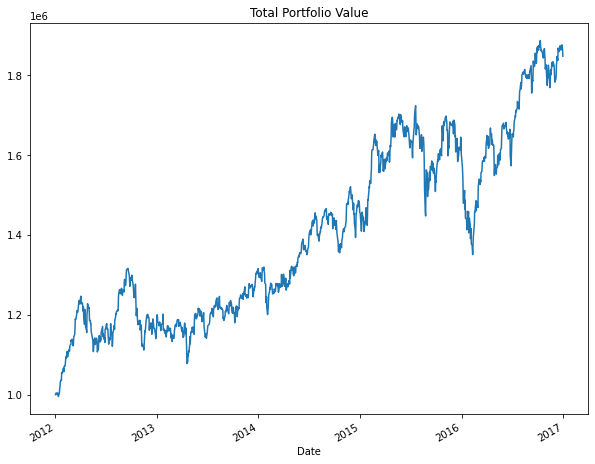

In [28]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

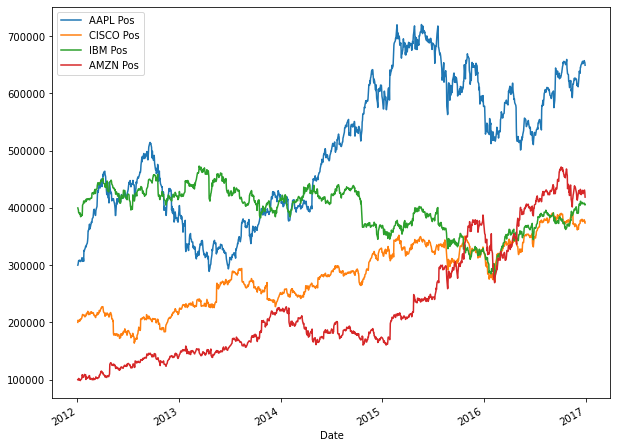

In [29]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8)) #to see individual stocks just plot the
#whole thing but get rid of the sum

<h1>Portfolio Stats</h1>

<p> I'll start with some daily return analysis which I have already done in other notebooks, let's get a histogram and the kde </p>

In [30]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [31]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [33]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [35]:
portfolio_val['Daily Return'].mean()


0.0005442330716215244

In [36]:
portfolio_val['Daily Return'].std()

0.010568287769161718

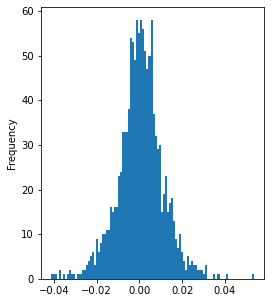

In [38]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(4,5))

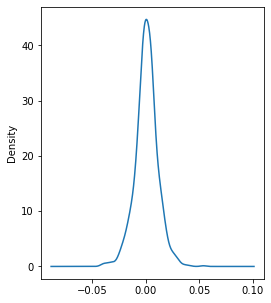

In [39]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5))

In [40]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)

In [41]:
cumulative_return

84.74285181665545

<h3>Now lets look at the Sharpe Ratio, which is a standard for calculating the risk adjusted return.</h3>

<p>It is essentially the mean portfolio return minus the risk free rate divided by the standard deviation, we are going to assume the risk free rate is equal to 0 here, which currently and for the period selected it basically was.  That said if the fed raised interest rates this would change, but they have been kept artificially low for many years now.</p>

In [42]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [43]:
SR

0.05149680662648092

The Sharp Ratio was meant to be a yearly data source, to get the annualized sharpe ratio you need to multiply by a k-value for your sampling rate.  In our case since our data is daily it will be the square root of 252 because there are 252 trading days in the year.  Square root is the same as raising to the exponent 0.5 so lets do it that way

In [45]:
ASR = (252**0.5) * SR
ASR

0.8174864618859096

Generally a sharpe ratio greater than 1 is acceptable to good depending on risk tolernance
A ratio higher than 2 is very good
A ratio higher than 3 is excellent

Now that we have this ratio we can actually use it to optimize our allocation mathematically

<h1>Portfolio Optimization</h1>


Now that we have a nice metric to evaluate Portfolio Allocations against each other, how can we optimize the portfolio holdings?

One answer might be to just throw shit at the wall; to guess and check a bunch of random allocations and see which one has the best Sharpe Ratio. 

But we are finance people and programmers so we don't call that guess and check or throwing shit at the wall we call that Monte Carlo Simulation.  We randomly assign a weight to each security in our portfolio, then calculate its mean daily return and std. dev. of daily return.

This allows us to calculate the Sharpe Ratio for thousands of randomly selected allocations.  We can then plot the allocations on a chart showin return vs volatility colored by the Sharpe Ratio.


-------------

As you may already know, guessing and checking is also kind of stupid and inefficient, and we can use math to figure out the optimal Sharpe Ratio for any given portfolio.  To understand optimization algorithms we have to look at minimization

y = x^2
y = (2-x)^2

What value of x will minimize y in these situations?  In the first 0 and in the second 2.  This idea of using a minimizer will allow us to build an optimizer.

Referring back to our sharpe ratio we actually want to maximize the SR, <strong>meaning we can create an optimizer that will attempt to minimize the negative Sharpe Ratio</strong> (I bolded it so that you know it is ingenius)



In [53]:
#I don't want this to get too messy so lets start from just the quandl data again with a new concat

stocks = pd.concat([aapl['Adj. Close'],cisco['Adj. Close'],ibm['Adj. Close'],amzn['Adj. Close']],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [52]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [54]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [56]:
stocks.pct_change(1).corr()

#this returns an interesting matrix, obviously the time series will be perfectly correlated
#with itself, but how correlated are these stocks to eachother? 

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [57]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [59]:
import numpy as np
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

#Here we can see the difference between the logarithmic return and the arithmatic return

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


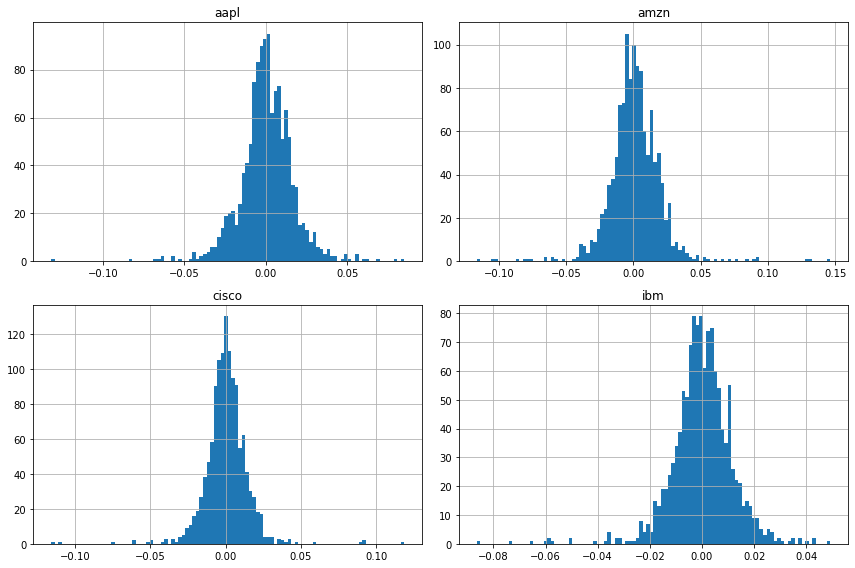

In [60]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [61]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [62]:
log_ret.cov() #covarients

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [63]:
log_ret.cov() * 252 #multiply by business days to put in context

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


<h2> The Monte Carlo Method </h2>

In [79]:
#That is enough digressing into log stuff, back to portfolio optimization
#Let's do the throw shit at the wall method first, time to create random weights

print(stocks.columns)

weights = np.array(np.random.random(4))
print("random weights:")
print(weights)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
random weights:
[0.68527698 0.83389686 0.30696622 0.89361308]


In [77]:
#Uh oh my weights don't add up to 1.  Should probably normalize that. 
#Normalize is easy, lets just divide by the sum of the weights
#Also everytime I run this it is different so lets freeze it with a seed

np.random.seed(101)
bbb
print(stocks.columns)

weights = np.array(np.random.random(4))
print("Random Weights:")
print(weights)


#Now Divide

weights = weights/np.sum(weights)

print("Rebalanced Weights:")
print(weights)

#Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum((log_ret.mean()*weights)*252)
print(exp_ret)

#exoected volatility
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print("Expected Volatility")
print(exp_vol)
#This one is linear algebra, its dotproduct of the covariance of the log returns multiplied by 252 
#Then take the Transpose of the weights put it all under a square root, its complex and it can be done
#With easier math but this will run faster and we need a lot of iterations.


#Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalanced Weights:
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
0.155992720496325
Expected Volatility
0.18502649565908943
Sharpe Ratio
0.8430831483926549


The next step would be to do all of this ^ , but 1000s of times over and ideally quickly.

In [80]:
#Step 1, don't just copy into a loop, remove the print statements, I forgot to do that and it was
# Hilarious.  I'll try to write this box better than the last so its more readable.
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    #Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    #Save Weights
    all_weights[ind,:] = weights

    #Expected Return
    ret_arr[ind] = np.sum((log_ret.mean()*weights)*252)

    #exoected volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    #Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [82]:
sharpe_arr.max() #This took about 15 seconds to run

1.0303260551271305

In [83]:
sharpe_arr.argmax() #grabbing the index location of the best Sharpe Ratio

1420

In [84]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

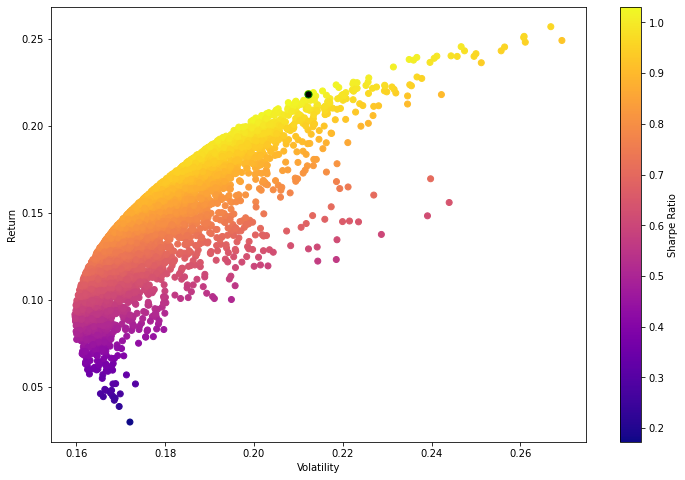

In [88]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


#To highlight the max
max_sr_ret= ret_arr[1420]
max_sr_vol = vol_arr[1420]
plt.scatter(max_sr_vol,max_sr_ret,c='black', s=50, edgecolors='green')

OK this is why we did it the Monte Carlo way first.  Let's think about this graph, the y-axis is the return and the x is the volatility.  The sharpe ratio is what is giving us a color with the yellow being the best sharpe ratio.  But whats worth noting is we have generated a curve on the edge there with the best sharpe ratio for each volatility. This is called the efficient frontier.

<h3>Mathematical Optimization</h3>

In [101]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean()*weights)*252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [91]:
from scipy.optimize import minimize

In [92]:
help(minimize) #To see how this works

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

In [93]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

#This function will take in weight allocation and return the negative sharpe ratio,
#By minimizing the negative we maximize the SR

In [94]:
def check_sum(weights): 
    #returns 0 if sum of the wieghts is 1, if not will return how off you are
    return np.sum(weights) - 1

In [95]:
#Create equation type constraint
cons = ({'type':'eq','fun':check_sum})

In [98]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [99]:
init_guess = [0.25,0.25,0.25,0.25]

In [102]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [103]:
opt_results

     fun: -1.0307168703349403
     jac: array([ 5.64306974e-05,  4.18424606e-05,  3.39921713e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628977, 0.20418982, 0.        , 0.5295204 ])

In [104]:
opt_results.x

array([0.26628977, 0.20418982, 0.        , 0.5295204 ])

In [105]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [106]:
#It looks like the peak sharpe ratio is around 1,03, and that is close to where our 5000 guesses
#got us as well

#the best y value for each x is the efficient frontier

In [107]:
frontier_y = np.linspace(0,0.3,100)

In [108]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [112]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

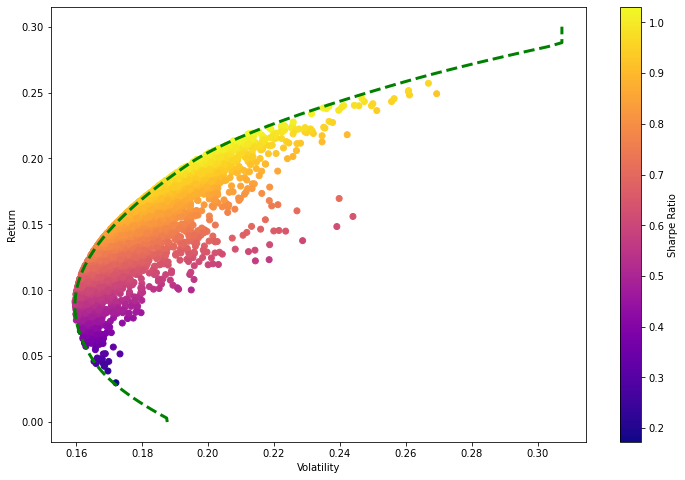

In [113]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

In [115]:
#This line is what we mathematically solved for and is the actual max possible optimization
#This is now overlayed on the results of the montecarlo simulation
#This technique is known as markowits portfolio optimization